## Demo for feature extraction module

In [2]:
!pip install git+https://github.com/lazyCodes7/blacbox.git

  Cloning https://github.com/lazyCodes7/blacbox.git to /tmp/pip-req-build-jn_zcjrx
  Running command git clone -q https://github.com/lazyCodes7/blacbox.git /tmp/pip-req-build-jn_zcjrx
  Resolved https://github.com/lazyCodes7/blacbox.git to commit de32d3b4b3d31a95179bd75b3259456ca34a0b4a
  Created wheel for blacbox: filename=blacbox-0.1.0-py3-none-any.whl size=449318 sha256=5e4bf69aa5d5154adcc83b81a9d267eb103577bf1357d587c6906d0908af5076
  Stored in directory: /tmp/pip-ephem-wheel-cache-zn5rek9k/wheels/3f/7f/5b/0080ca80a4b372f7477021311eb65e194a0a4452409988b28d
Successfully built blacbox


In [3]:
!python extract.py --image_dir sample_folder --model_path models/artDLresnet50_224x224.pt

/home/nightskies/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/nightskies/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
torch.Size([8, 512, 14, 14])


In [3]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision.models as models
import torch

In [4]:
from blacbox import GCAM_plus
from PIL import Image
from transform import Transform
import os
import torchvision.transforms as transforms

In [5]:
from models import ArtDLClassifier

In [6]:
model = ArtDLClassifier(num_classes = 19)

In [7]:
model.load_state_dict(torch.load('models/artDLresnet50_224x224.pt', map_location = 'cpu'))

<All keys matched successfully>

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224))
])

In [9]:
image_dir = 'sample_folder'

In [10]:
images = []
for image in os.listdir(image_dir):
    image = transform(Image.open(image_dir + "/" + image))
    images.append(image)

In [11]:
images = torch.stack(images, dim = 0)

In [12]:
images.shape

torch.Size([124, 3, 224, 224])

In [13]:
from blacbox import GCAM_plus

In [14]:
gcam = GCAM_plus(
    model = model,
    interpolate = 'bilinear',
    device = 'cpu'
)

In [15]:
model.eval()
heatmaps = gcam.reveal(
  images = images, 
  module = model.net[7][0].conv1,
  class_idx = 'keepmax',
  colormap = 'hsv'
 )

In [16]:
import matplotlib.pyplot as plt

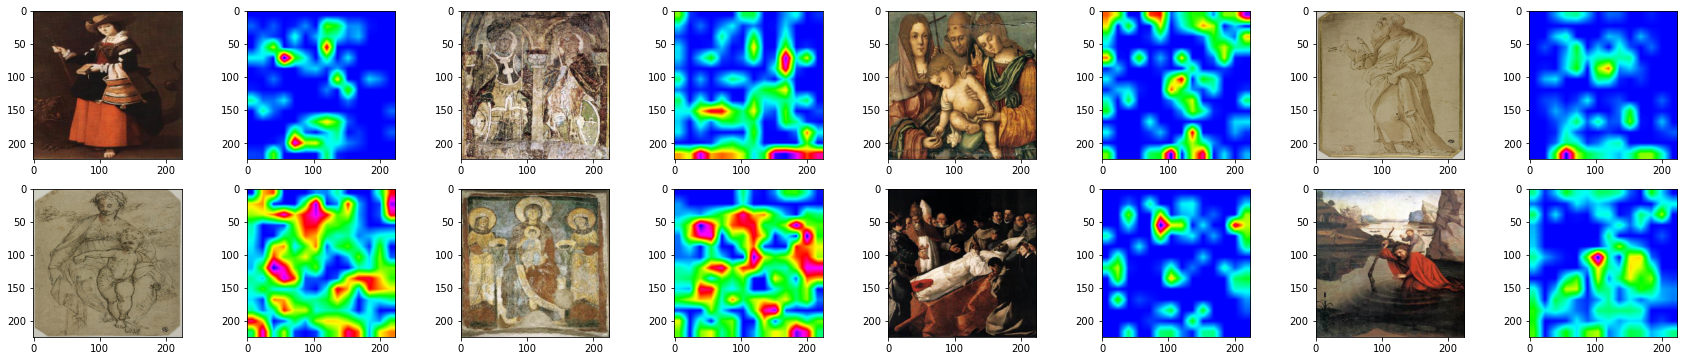

In [17]:
idx = 0
fig, axes = plt.subplots(2, 8, figsize=(30,6))
for i in range(2):
    for j in range(8):
        if(j%2 == 0):
            image = images[idx]
            image = image.cpu().detach().squeeze(0).permute(1,2,0).numpy()
            axes[i,j].imshow(image)
        else:
            heatmap = heatmaps[idx]
            axes[i, j].imshow(heatmap)
            idx+=1
plt.show()

In [18]:
ret_images = gcam.overlay(
  images = images,
  heatmaps = heatmaps,
  is_np = True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


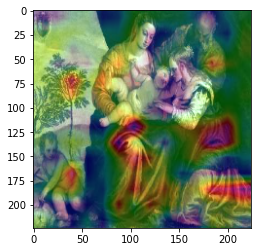

In [19]:
plt.imshow(ret_images[23])

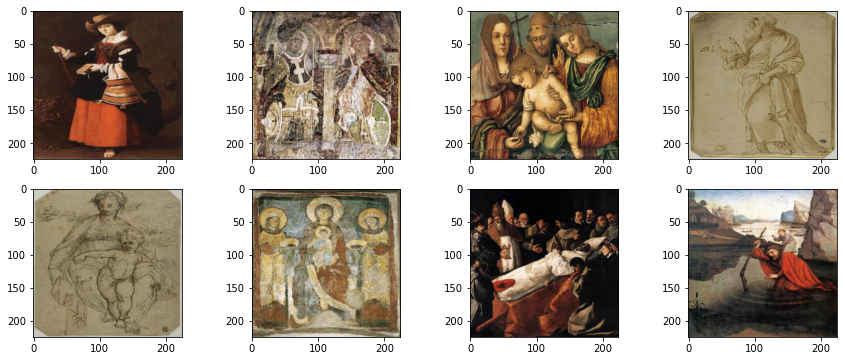

In [20]:
idx = 0
fig, axes = plt.subplots(2, 4, figsize=(15,6))
for i in range(2):
    for j in range(4):
        image = images[idx]
        image = image.cpu().detach().squeeze(0).permute(1,2,0).numpy()
        axes[i, j].imshow(image)
        idx+=1
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


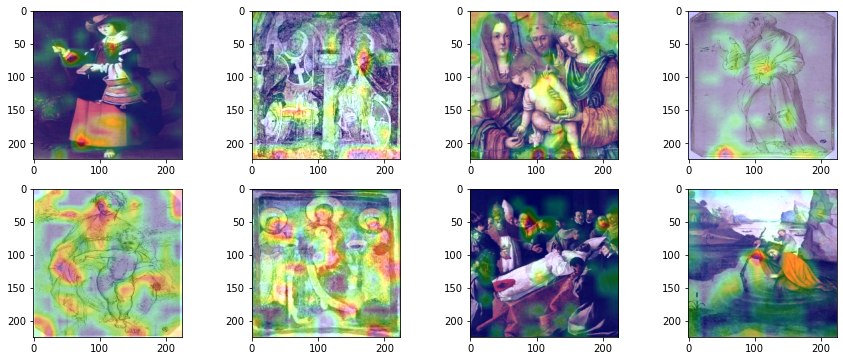

In [21]:
idx = 0
fig, axes = plt.subplots(2, 4, figsize=(15,6))
for i in range(2):
    for j in range(4):
        ret_image = ret_images[idx]
        axes[i, j].imshow(ret_image)
        idx+=1
plt.show()

In [22]:
heatmaps[0].shape

(224, 224, 3)

In [23]:
transform = transforms.Compose([
    transforms.Resize((1000, 1000))
])

In [24]:
ret_images[1].shape

(224, 224, 3)

In [62]:
from PIL import Image, ImageEnhance


img1 = torch.tensor(ret_images[2]).permute(2,0,1)
img1 = transform(img1)
img1 = img1.cpu().detach().squeeze(0).permute(1,2,0).numpy()
img2 = transform(images[2])
img2 = img2.cpu().detach().squeeze(0).permute(1,2,0).numpy()
img2*=255
img2 = img2.astype(np.uint8)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
vis = np.concatenate((img1, img2), axis=1)

In [26]:
import cv2

In [27]:
for i in range(len(ret_images)):
    img1 = torch.tensor(ret_images[i]).permute(2,0,1)
    img1 = transform(img1)
    img1 = img1.cpu().detach().squeeze(0).permute(1,2,0).numpy()
    img2 = transform(images[i])
    img2 = img2.cpu().detach().squeeze(0).permute(1,2,0).numpy()
    img2*=255
    img2 = img2.astype(np.uint8)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    vis = np.concatenate((img1, img2), axis=1)
    cv2.imwrite('demo_images/{}.jpeg'.format(i), vis)

In [68]:
i = 0
img1 = torch.tensor(ret_images[i]).permute(2,0,1)
img1 = transform(img1)
img1 = img1.cpu().detach().squeeze(0).permute(1,2,0).numpy()
img2 = transform(images[i])
img2 = img2.cpu().detach().squeeze(0).permute(1,2,0).numpy()
img2*=255
img2 = img2.astype(np.uint8)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
vis = np.concatenate((img1, img2), axis=1)
cv2.imwrite('demo_images/{}.jpeg'.format(i), vis)

False

In [69]:
'demo_images/{}.jpeg'.format(i)

'demo_images/0.jpeg'

In [2]:
import os
os.listdir('demo_images')

[]

In [60]:
vis = vis.astype(np.uint8)

In [ ]:
cv2.

In [63]:
cv2.imwrite('index.jpeg', vis)

True

In [52]:
img1.shape

(2000, 2000, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


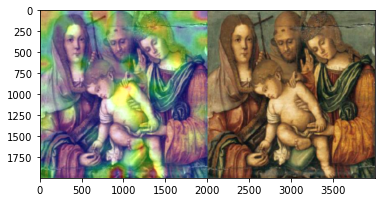

In [51]:
plt.imshow(vis)

In [32]:
ret_images

array([[[[ 65,  47, 114],
         [ 62,  44, 110],
         [ 59,  41, 108],
         ...,
         [ 59,  45, 110],
         [ 61,  47, 112],
         [ 65,  51, 116]],

        [[ 66,  48, 115],
         [ 63,  45, 111],
         [ 60,  42, 109],
         ...,
         [ 56,  42, 108],
         [ 56,  42, 108],
         [ 59,  45, 111]],

        [[ 65,  47, 114],
         [ 62,  44, 110],
         [ 59,  41, 107],
         ...,
         [ 57,  43, 109],
         [ 58,  44, 110],
         [ 59,  45, 111]],

        ...,

        [[100,  83, 119],
         [104,  88, 124],
         [109,  93, 128],
         ...,
         [ 70,  52, 114],
         [ 71,  53, 115],
         [ 71,  53, 115]],

        [[105,  89, 123],
         [110,  94, 127],
         [114,  98, 131],
         ...,
         [ 72,  56, 117],
         [ 72,  56, 117],
         [ 72,  56, 117]],

        [[115,  99, 132],
         [118, 102, 134],
         [121, 105, 137],
         ...,
         [ 73,  57, 118],
        

In [31]:
img2.shape

(224, 224, 3)

In [48]:
images[0].cpu().detach().squeeze(0).permute(1,2,0).numpy().shape

(224, 224, 3)

In [21]:
ret_images[0]

array([[[ 65,  47, 114],
        [ 62,  44, 110],
        [ 59,  41, 108],
        ...,
        [ 59,  45, 110],
        [ 61,  47, 112],
        [ 65,  51, 116]],

       [[ 66,  48, 115],
        [ 63,  45, 111],
        [ 60,  42, 109],
        ...,
        [ 56,  42, 108],
        [ 56,  42, 108],
        [ 59,  45, 111]],

       [[ 65,  47, 114],
        [ 62,  44, 110],
        [ 59,  41, 107],
        ...,
        [ 57,  43, 109],
        [ 58,  44, 110],
        [ 59,  45, 111]],

       ...,

       [[100,  83, 119],
        [104,  88, 124],
        [109,  93, 128],
        ...,
        [ 70,  52, 114],
        [ 71,  53, 115],
        [ 71,  53, 115]],

       [[105,  89, 123],
        [110,  94, 127],
        [114,  98, 131],
        ...,
        [ 72,  56, 117],
        [ 72,  56, 117],
        [ 72,  56, 117]],

       [[115,  99, 132],
        [118, 102, 134],
        [121, 105, 137],
        ...,
        [ 73,  57, 118],
        [ 72,  56, 117],
        [ 72,  56, 117]]